# Useful Functions

In [2]:
def interpret_p_value(p_value, alpha=0.05):
    """
    Interprets the significance of a given p-value.

    Parameters:
    - p_value (float): The p-value to interpret.
    - alpha (float): The significance level, default is 0.05.

    Returns:
    - str: Interpretation of the p-value.
    """

    if p_value < alpha:
        return f"The p-value is {p_value:.3f}. This is less than the significance level of {alpha}. Therefore, we reject the null hypothesis."
    else:
        return f"The p-value is {p_value:.3f}. This is greater than or equal to the significance level of {alpha}. Therefore, we fail to reject the null hypothesis."

# Libraries and Data

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [4]:
%cd /content/drive/MyDrive/Business Analyst course/Advanced Analytics/Multivariate A B Testing

/content/drive/MyDrive/Business Analyst course/Advanced Analytics/Multivariate A B Testing


In [5]:
# Load the CSV file
df = pd.read_csv("ab_google.csv")
df.head(10)

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration
0,1,Original,Original,Original,3882
1,2,Rectangle,Original,Light Pink,3400
2,3,Original,Original,Original,3489
3,4,Original,Star,Light Pink,4320
4,5,Rectangle,Star,Light Pink,4333
5,6,Original,Star,Light Pink,2711
6,7,Rectangle,Star,Light Pink,3875
7,8,Original,Star,Light Pink,3124
8,9,Original,Star,Original,3148
9,10,Rectangle,Original,Light Pink,3405


# EDA with ChatGPT

In [6]:
# 1. Descriptive Statistics
df.describe()

,Participant ID,Session Duration
count,20000.000000,20000.000000
mean,10000.500000,3195.981050
std,5773.647028,515.170132
min,1.000000,776.000000
25%,5000.750000,2853.000000
50%,10000.500000,3193.000000
75%,15000.250000,3539.000000
max,20000.000000,5134.000000


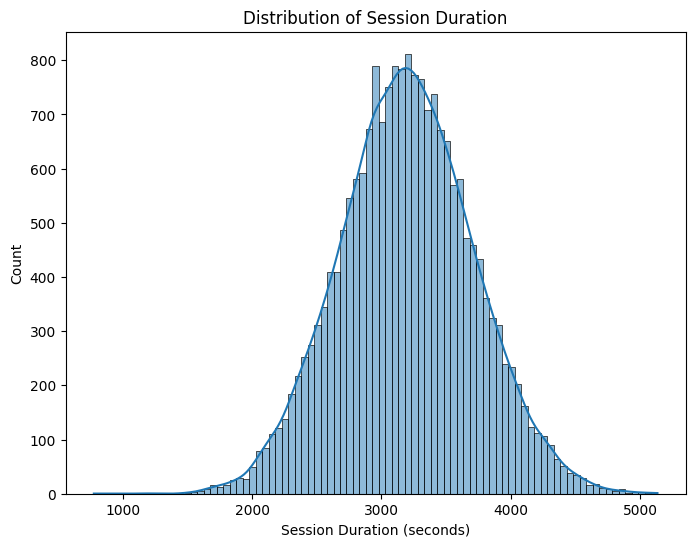

In [7]:
# 2. Distribution Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Session Duration'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (seconds)')
plt.show()

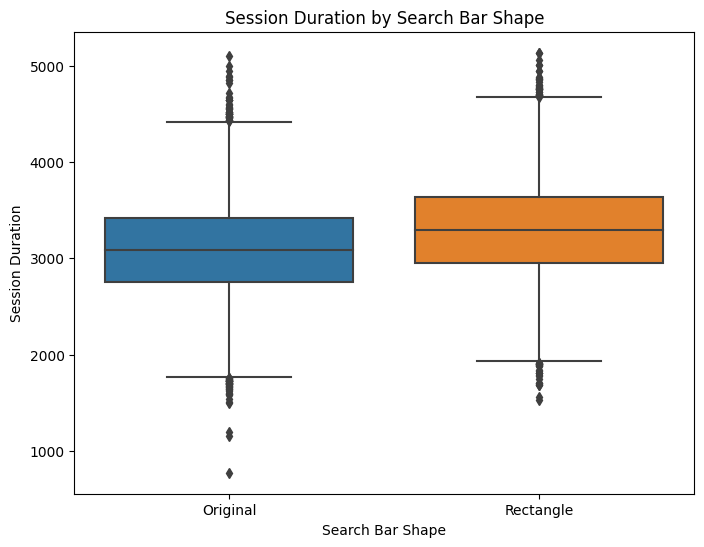

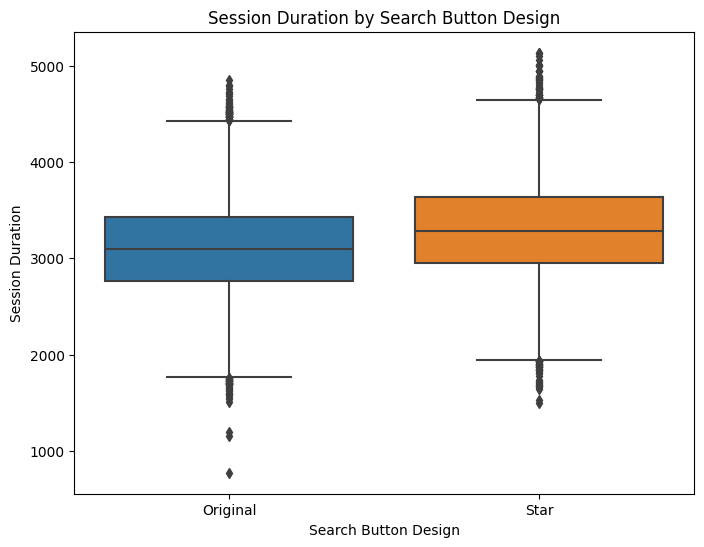

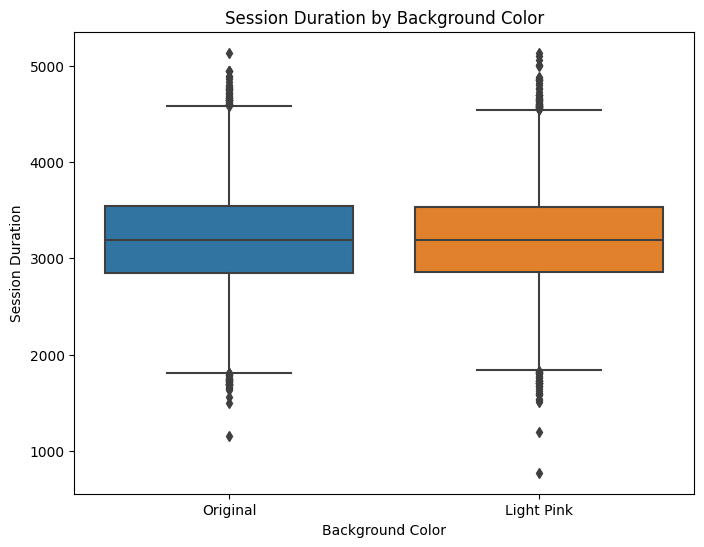

In [8]:
# 3. Comparison of Session Duration by Design Elements
plt.figure(figsize=(8, 6))
sns.boxplot(x='Search Bar Shape', y='Session Duration', data=df)
plt.title('Session Duration by Search Bar Shape')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Search Button Design', y='Session Duration', data=df)
plt.title('Session Duration by Search Button Design')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Background Color', y='Session Duration', data=df)
plt.title('Session Duration by Background Color')
plt.show()

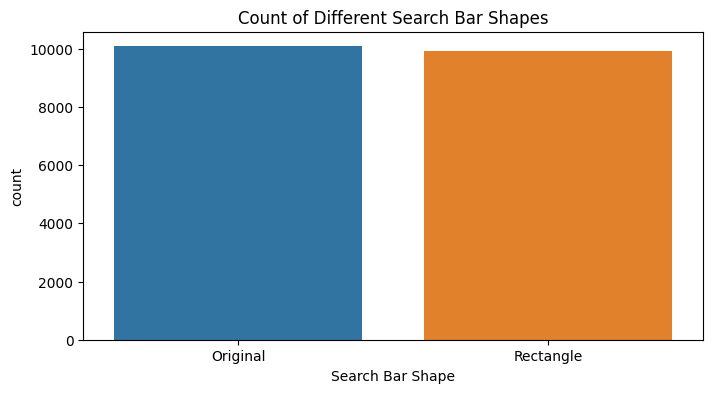

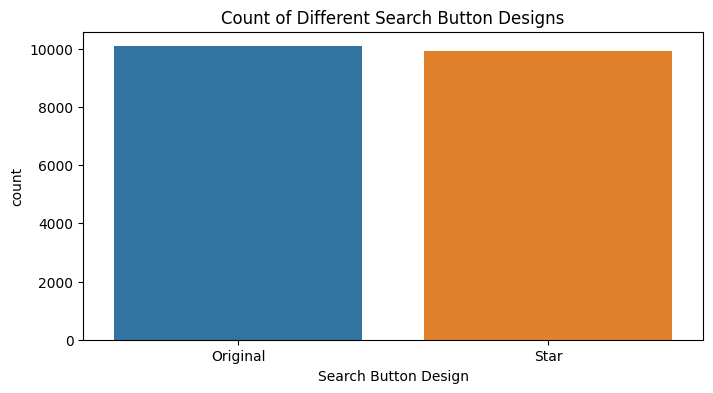

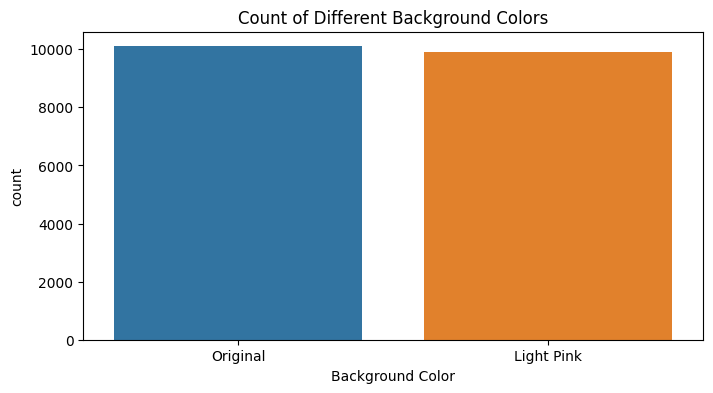

In [9]:
# 4. Count of Different Design Elements
plt.figure(figsize=(8, 4))
sns.countplot(x='Search Bar Shape', data=df)
plt.title('Count of Different Search Bar Shapes')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Search Button Design', data=df)
plt.title('Count of Different Search Button Designs')
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Background Color', data=df)
plt.title('Count of Different Background Colors')
plt.show()


# Full Factorial

In [10]:
# Creating a new variable represing the 8 combinations
df['Combination'] = df['Search Bar Shape'] + "_" + df['Search Button Design'] + "_" + df['Background Color']
df.head()

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration,Combination
0,1,Original,Original,Original,3882,Original_Original_Original
1,2,Rectangle,Original,Light Pink,3400,Rectangle_Original_Light Pink
2,3,Original,Original,Original,3489,Original_Original_Original
3,4,Original,Star,Light Pink,4320,Original_Star_Light Pink
4,5,Rectangle,Star,Light Pink,4333,Rectangle_Star_Light Pink


In [11]:
# Calculating average session duration for each combination
average_duration = df.groupby('Combination')['Session Duration'].mean().sort_values().reset_index()
average_duration

,Combination,Session Duration
0,Original_Original_Original,2990.855487
1,Original_Original_Light Pink,3006.383643
2,Original_Star_Original,3184.725366
3,Original_Star_Light Pink,3189.628900
4,Rectangle_Original_Light Pink,3204.903800
5,Rectangle_Original_Original,3207.471297
6,Rectangle_Star_Light Pink,3387.574797
7,Rectangle_Star_Original,3409.633373


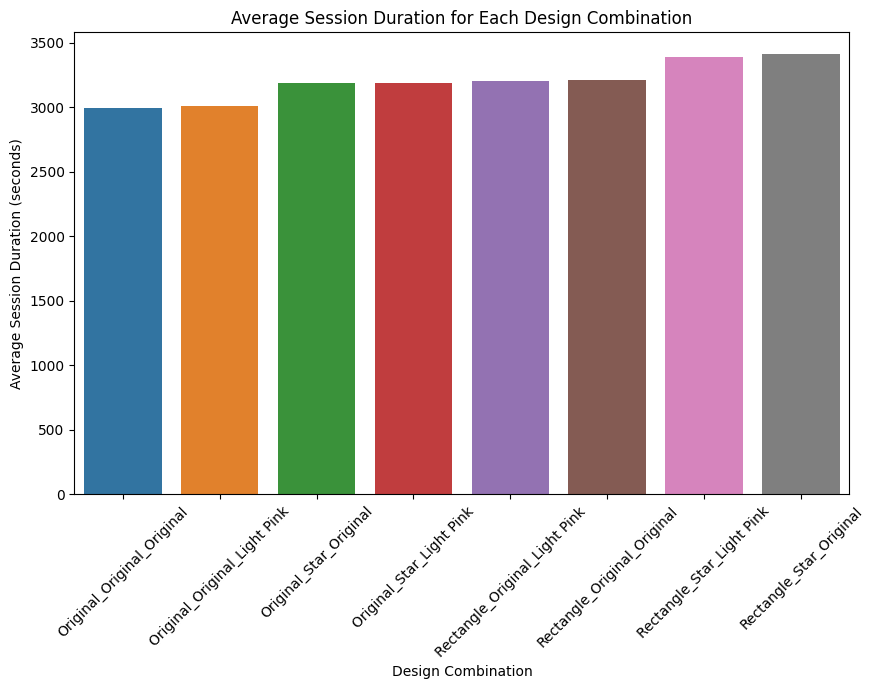

In [12]:
# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Combination', y='Session Duration', data=average_duration)
plt.xticks(rotation=45)
plt.title('Average Session Duration for Each Design Combination')
plt.xlabel('Design Combination')
plt.ylabel('Average Session Duration (seconds)')
plt.show()

In [13]:
# Extract the session duration for each combination
grouped = df.groupby('Combination')['Session Duration']

Null hypothesis: There is no influence of the variants in the Session duration

Alternative Hypothesis: The Variants influence the Session value

In [14]:
# Perform ANOVA
F, p_value = stats.f_oneway(*[group for name, group in grouped])
interpret_p_value(p_value, alpha = 0.05)

'The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.'

In [15]:
# Perform the Tukey's HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog = df['Session Duration'],
                          groups = df['Combination'],
                          alpha = 0.05)
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------
 Original_Original_Light Pink    Original_Original_Original -15.5282 0.9523 -57.4919  26.4356  False
 Original_Original_Light Pink      Original_Star_Light Pink 183.2453    0.0 140.6391 225.8514   True
 Original_Original_Light Pink        Original_Star_Original 178.3417    0.0 136.1283 220.5551   True
 Original_Original_Light Pink Rectangle_Original_Light Pink 198.5202    0.0 156.0811 240.9592   True
 Original_Original_Light Pink   Rectangle_Original_Original 201.0877    0.0 158.7219 243.4534   True
 Original_Original_Light Pink     Rectangle_Star_Light Pink 381.1912    0.0 338.6911 423.6912   True
 Original_Original_Light Pink       Rectangle_Star_Original 403.2497    0.0 360.8925 445.60

# Partial Factorial

In [16]:
df.Combination.unique()

array(['Original_Original_Original', 'Rectangle_Original_Light Pink',
       'Original_Star_Light Pink', 'Rectangle_Star_Light Pink',
       'Original_Star_Original', 'Original_Original_Light Pink',
       'Rectangle_Star_Original', 'Rectangle_Original_Original'],
      dtype=object)

In [17]:
# Defining the combinations for the Testing
selection = ['Original_Original_Original',
             'Rectangle_Original_Light Pink',
             'Rectangle_Star_Light Pink',
             'Original_Star_Original']

In [18]:
# Filter the DF for only the selected combinations
df_partial = df[df['Combination'].isin(selection)]

In [19]:
# Extract the session duration for each combination
grouped_partial = df_partial.groupby('Combination')['Session Duration']

Null hypothesis: There is no influence of the variants in the Session duration

Alternative Hypothesis: The Variants influence the Session value

In [20]:
# Perform ANOVA
F, p_value = stats.f_oneway(*[group for name, group in grouped_partial])
interpret_p_value(p_value, alpha = 0.05)

'The p-value is 0.000. This is less than the significance level of 0.05. Therefore, we reject the null hypothesis.'

In [21]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(endog = df_partial['Session Duration'],
                          groups = df_partial['Combination'],
                          alpha = 0.05)
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                        group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------------------
   Original_Original_Original        Original_Star_Original 193.8699    0.0 158.4493 229.2904   True
   Original_Original_Original Rectangle_Original_Light Pink 214.0483    0.0 178.4363 249.6603   True
   Original_Original_Original     Rectangle_Star_Light Pink 396.7193    0.0 361.0555 432.3831   True
       Original_Star_Original Rectangle_Original_Light Pink  20.1784 0.4697  -15.643  55.9999  False
       Original_Star_Original     Rectangle_Star_Light Pink 202.8494    0.0 166.9765 238.7224   True
Rectangle_Original_Light Pink     Rectangle_Star_Light Pink  182.671    0.0  146.609  218.733   True
-------------------------------------------------------------------------------------------

In [22]:
# Encoding of the categorical variable
df_encoded = pd.get_dummies(df_partial,
                            columns = ['Search Bar Shape',
                                       'Search Button Design',
                                       'Background Color'],
                            drop_first=True)

In [23]:
# Preview the data
df_partial.head()

,Participant ID,Search Bar Shape,Search Button Design,Background Color,Session Duration,Combination
0,1,Original,Original,Original,3882,Original_Original_Original
1,2,Rectangle,Original,Light Pink,3400,Rectangle_Original_Light Pink
2,3,Original,Original,Original,3489,Original_Original_Original
4,5,Rectangle,Star,Light Pink,4333,Rectangle_Star_Light Pink
6,7,Rectangle,Star,Light Pink,3875,Rectangle_Star_Light Pink


In [24]:
# Rename columns to remove spaces
df_encoded.columns = [col.replace(' ', '_') for col in df_encoded.columns]
df_encoded.head()

,Participant_ID,Session_Duration,Combination,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
0,1,3882,Original_Original_Original,0,0,1
1,2,3400,Rectangle_Original_Light Pink,1,0,0
2,3,3489,Original_Original_Original,0,0,1
4,5,4333,Rectangle_Star_Light Pink,1,1,0
6,7,3875,Rectangle_Star_Light Pink,1,1,0


In [25]:
from itertools import product

In [26]:
# Define the feature states for each possible combination
feature_values = {
    'Search_Bar_Shape_Rectangle': [1, 0], # 1 for Rectangle, 0 for Original
    'Search_Button_Design_Star': [1, 0], # 1 for Star, 0, for Original
    'Background_Color_Original': [1, 0] # 1 for Original, 0 for Light Pink
}

#Generate 8 combinations
all_combinations = list(product(*feature_values.values()))
all_combinations

[(1, 1, 1),
 (1, 1, 0),
 (1, 0, 1),
 (1, 0, 0),
 (0, 1, 1),
 (0, 1, 0),
 (0, 0, 1),
 (0, 0, 0)]

### Regression Analysis

In [27]:
import statsmodels.api as sm

In [28]:
# Prepare and isolate X and Y
y = df_encoded['Session_Duration']
X = df_encoded[['Search_Bar_Shape_Rectangle',
                'Search_Button_Design_Star',
                'Background_Color_Original']]

In [29]:
# add a constant
X_constant = sm.add_constant(X)

In [34]:
# Linear Regression model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Session_Duration   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     410.0
Date:                Sun, 24 Dec 2023   Prob (F-statistic):          7.07e-172
Time:                        14:36:40   Log-Likelihood:                -76564.
No. Observations:               10049   AIC:                         1.531e+05
Df Residuals:                   10046   BIC:                         1.532e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Search_Bar_Shape_Rectangle  3202.0619      8.560    374.051      0.000    3185.282    3218.842
Search_Button_Design_Star    188.3709      9.834     19.154      0.000     169.094     207.648
Background_Color_Original   2993.5722      8.432    355.013      0.000    2977.043    3010.101
==============================================================================
Omnibus:                        5.993   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.008
Skew:                           0.054   Prob(JB):                       0.0496
Kurtosis:                       2.948   Cond. No.                         2.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Remove outliers


Check for multicollinearity

In [33]:
X_constant.corr()

,const,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
const,NaN,NaN,NaN,NaN
Search_Bar_Shape_Rectangle,NaN,1.000000,0.004544,-1.000000
Search_Button_Design_Star,NaN,0.004544,1.000000,-0.004544
Background_Color_Original,NaN,-1.000000,-0.004544,1.000000


When the inputs are just dummy variables, you don't add a constant to the predictos

If you pursue Regression Analysis, you need to create interaction terms for the variants

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [36]:
# Splitting the data data into  training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)
X_train.head()

,Search_Bar_Shape_Rectangle,Search_Button_Design_Star,Background_Color_Original
10729,0,1,1
3954,1,1,0
13474,1,0,0
9699,0,0,1
17547,0,0,1


In [37]:
# Build the model
model2 = RandomForestRegressor(n_estimators = 10).fit(X_train, y_train)

In [38]:
# Making predictions on the test set
y_pred = model2.predict(X_test)
y_pred

array([3203.16719519, 2991.93729638, 3203.16719519, ..., 3203.16719519,
       3384.71820737, 2991.93729638])

In [40]:
# Calculate the MAE and MAPE
print(f"The MAE is {mean_absolute_error(y_test, y_pred)}")
print(f"The MAPE is {mean_absolute_percentage_error(y_test, y_pred)}")

The MAE is 395.9254747904269
The MAPE is 0.12921263991743948


### Parameter Tuning for Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# Define the Parameter Grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 1, 3],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 3, 5]
}

In [43]:
# Build the model
rf = RandomForestRegressor(random_state = 1502)

In [45]:
# Set up the Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = "neg_mean_absolute_error",
    n_jobs = 3,
    cv = 5,
    verbose = 2
    )

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1502), n_jobs=3,
             param_grid={'max_depth': [None, 1, 3],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [46]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f"The Best parameters are {best_params}")

The Best parameters are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [47]:
# Build a model with the best parameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [48]:
# Assess the best model
y_pred = best_model.predict(X_test)

In [49]:
# Calculate the MAE and MAPE
print(f"The MAE is {mean_absolute_error(y_test, y_pred)}")
print(f"The MAPE is {mean_absolute_percentage_error(y_test, y_pred)}")

The MAE is 395.9177409071152
The MAPE is 0.12920941718850826


### Infer the untested variants

In [75]:
# Generate predictions for all combinations
predictions = []
for combinations in all_combinations:
  variant = dict(zip(feature_values.keys(), combinations))
  X_variant = pd.DataFrame([variant])
  predicted_duration = best_model.predict(X_variant)[0]

  # Construct variant name based on the state of each feature
  variant_name = '_'.join(
      ['Rectangle' if variant['Search_Bar_Shape_Rectangle'] else 'Original',
       'Star' if variant['Search_Button_Design_Star'] else 'Original',
       'Original' if variant['Background_Color_Original'] else 'Light Pink'])
  predictions.append((variant_name, predicted_duration))

predictions

[('Rectangle_Star_Original', 3241.748050197991),
 ('Rectangle_Star_Light Pink', 3382.5903473058993),
 ('Rectangle_Original_Original', 3073.92388898282),
 ('Rectangle_Original_Light Pink', 3205.464471076139),
 ('Original_Star_Original', 3183.5180390078144),
 ('Original_Star_Light Pink', 3324.3603361157234),
 ('Original_Original_Original', 2989.3067630920095),
 ('Original_Original_Light Pink', 3120.8473451853292)]

In [76]:
# Build a DF
prediction_table = pd.DataFrame(
    predictions,
    columns = ['Combination', 'Predicted Session Duration']
).sort_values(by = "Predicted Session Duration")
prediction_table

,Combination,Predicted Session Duration
6,Original_Original_Original,2989.306763
2,Rectangle_Original_Original,3073.923889
7,Original_Original_Light Pink,3120.847345
4,Original_Star_Original,3183.518039
3,Rectangle_Original_Light Pink,3205.464471
0,Rectangle_Star_Original,3241.748050
5,Original_Star_Light Pink,3324.360336
1,Rectangle_Star_Light Pink,3382.590347


In [70]:
average_duration1 = average_duration.reset_index()

In [79]:
# Merge the 2 DataFrames
comparison_table = pd.merge(
    average_duration,
    prediction_table,
    on = "Combination"
)

# Calculate the error in percentage
comparison_table["Error_Percentage"] = 100 * (
    comparison_table["Predicted Session Duration"] - comparison_table['Session Duration']) / comparison_table['Session Duration']
comparison_table

,Combination,Session Duration,Predicted Session Duration,Error_Percentage
0,Original_Original_Original,2990.855487,2989.306763,-0.051782
1,Original_Original_Light Pink,3006.383643,3120.847345,3.807355
2,Original_Star_Original,3184.725366,3183.518039,-0.037910
3,Original_Star_Light Pink,3189.628900,3324.360336,4.224047
4,Rectangle_Original_Light Pink,3204.903800,3205.464471,0.017494
5,Rectangle_Original_Original,3207.471297,3073.923889,-4.163635
6,Rectangle_Star_Light Pink,3387.574797,3382.590347,-0.147139
7,Rectangle_Star_Original,3409.633373,3241.748050,-4.923853


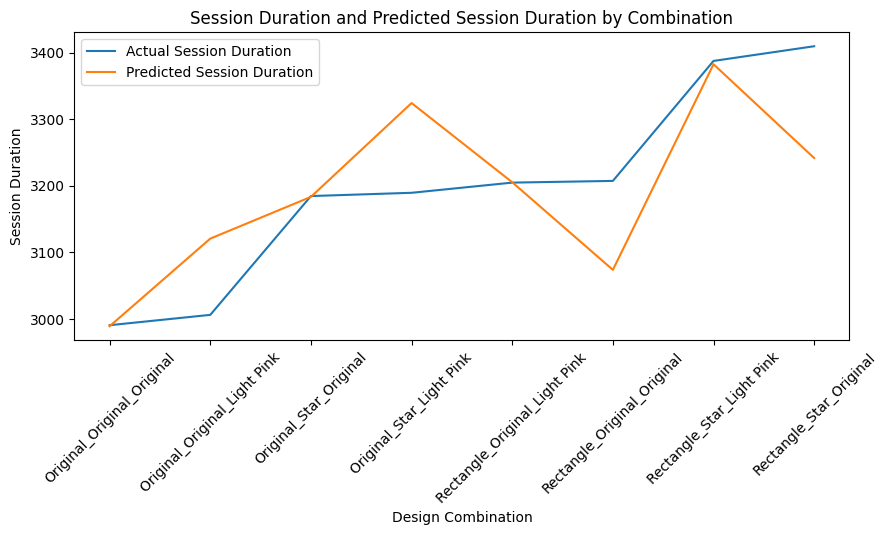

In [82]:
 # 2. Line Chart for Session Durations and Predictions
plt.figure(figsize=(10, 4))
plt.plot(comparison_table['Combination'],
         comparison_table['Session Duration'],
         label='Actual Session Duration')
plt.plot(comparison_table['Combination'],
         comparison_table['Predicted Session Duration'],
         label='Predicted Session Duration')
plt.xticks(rotation=45)
plt.title('Session Duration and Predicted Session Duration by Combination')
plt.xlabel('Design Combination')
plt.ylabel('Session Duration')
plt.legend()
plt.show()